In [71]:
import pandas as pd
pd.options.mode.chained_assignment = None
import os
from datetime import date
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import itertools
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn import metrics
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
from sklearn.metrics import confusion_matrix,r2_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor
#import rfpimp
#from rfpimp import *
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [136]:
data_filename = 'data.csv'
my_bucket = os.getenv('WORKSPACE_BUCKET')

os.system(f"gsutil cp '{my_bucket}/data/{data_filename}' .")
print(f'[INFO] {data_filename} is successfully downloaded into your working space')

# This is the data to work with
df = pd.read_csv('data.csv')
df = df.drop(['person_id','survey_datetime'],1)
df = df.rename(columns={'label': 'vaccine_hesitancy'})

In [113]:
import matplotlib.pyplot as plt

In [114]:
import seaborn as sns 

In [115]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71600 entries, 0 to 71599
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   vaccine_hesitancy       71600 non-null  int64  
 1   covid_death             71600 non-null  int64  
 2   withdrawn               71600 non-null  float64
 3   distancing_stress       71600 non-null  float64
 4   social_interaction      71600 non-null  float64
 5   lack_companionship      71600 non-null  float64
 6   can_find_companionship  71600 non-null  float64
 7   gen_health              71600 non-null  float64
 8   gen_mental_health       71600 non-null  float64
 9   gen_social_health       71600 non-null  float64
 10  gen_social_satisfac     71600 non-null  float64
 11  no_home                 71600 non-null  int64  
 12  no_meds                 71600 non-null  int64  
 13  no_food                 71600 non-null  int64  
 14  no_gas                  71600 non-null

In [116]:
df.describe()

,vaccine_hesitancy,covid_death,withdrawn,distancing_stress,social_interaction,lack_companionship,can_find_companionship,gen_health,gen_mental_health,gen_social_health,...,race_multiple,race_other,race_white,ethn_hispanic,ethn_none_of_these,ethn_not_hispanic,sex_female,sex_male,gender_female,gender_male
count,71600.000000,71600.000000,7.160000e+04,71600.000000,71600.000000,7.160000e+04,7.160000e+04,7.160000e+04,7.160000e+04,7.160000e+04,...,71600.000000,71600.000000,71600.000000,71600.000000,71600.000000,71600.000000,71600.000000,71600.000000,71600.000000,71600.000000
mean,0.757332,0.278980,9.108624e-01,1.088329,0.632508,1.083842e+00,2.442214e+00,2.446394e+00,2.705668e+00,2.895801e+00,...,0.017584,0.012654,0.808170,0.071690,0.008953,0.906034,0.651634,0.340712,0.645126,0.337919
std,0.428699,0.448501,8.282322e-13,0.933493,1.263366,6.292788e-13,1.421095e-12,6.248379e-13,2.367456e-12,2.577956e-12,...,0.131434,0.111775,0.393743,0.257976,0.094194,0.291784,0.476456,0.473952,0.478479,0.473004
min,0.000000,0.000000,9.108624e-01,0.000000,0.000000,1.083842e+00,2.442214e+00,2.446394e+00,2.705668e+00,2.895801e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,9.108624e-01,0.000000,0.000000,1.083842e+00,2.442214e+00,2.446394e+00,2.705668e+00,2.895801e+00,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,9.108624e-01,1.000000,0.000000,1.083842e+00,2.442214e+00,2.446394e+00,2.705668e+00,2.895801e+00,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,9.108624e-01,2.000000,1.000000,1.083842e+00,2.442214e+00,2.446394e+00,2.705668e+00,2.895801e+00,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,9.108624e-01,3.000000,5.000000,1.083842e+00,2.442214e+00,2.446394e+00,2.705668e+00,2.895801e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
df.columns


Index(['vaccine_hesitancy', 'covid_death', 'withdrawn', 'distancing_stress',
       'social_interaction', 'lack_companionship', 'can_find_companionship',
       'gen_health', 'gen_mental_health', 'gen_social_health',
       'gen_social_satisfac', 'no_home', 'no_meds', 'no_food', 'no_gas',
       'no_rent', 'no_hardship', 'family_conflict', 'family_yelling',
       'friend_conflict', 'no_conflict', 'age', 'race_asian', 'race_black',
       'race_multiple', 'race_other', 'race_white', 'ethn_hispanic',
       'ethn_none_of_these', 'ethn_not_hispanic', 'sex_female', 'sex_male',
       'gender_female', 'gender_male'],
      dtype='object')

AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'show'

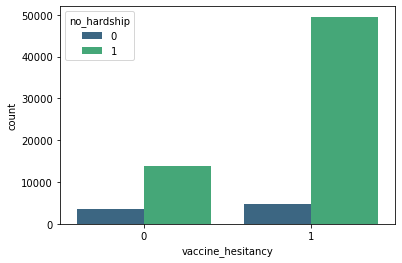

In [119]:
sns.countplot('vaccine_hesitancy',data=df,palette='viridis',hue='no_hardship')

fig.show()

AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'show'

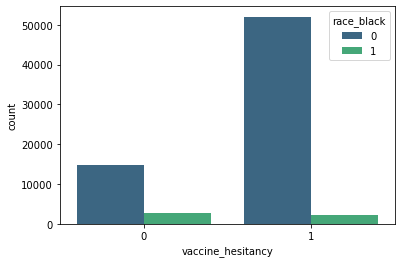

In [120]:
sns.countplot('vaccine_hesitancy',data=df,palette='viridis',hue='race_black')
fig.show()

AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'show'

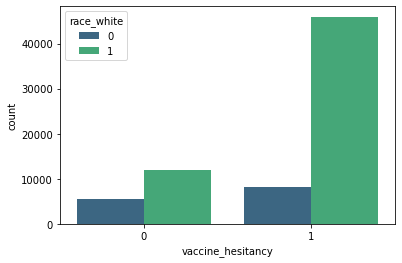

In [121]:
sns.countplot('vaccine_hesitancy',data=df,palette='viridis',hue='race_white')
fig.show()

AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'show'

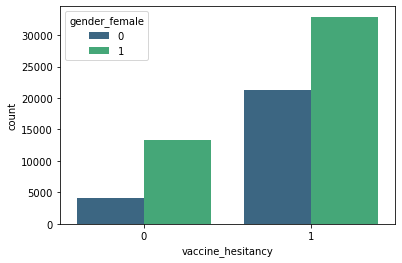

In [122]:
sns.countplot('vaccine_hesitancy',data=df,palette='viridis',hue='gender_female')
fig.show()

In [123]:
# all our variables
predictors = ['covid_death', 'withdrawn', 'distancing_stress', 'social_interaction', 'lack_companionship',
          'can_find_companionship', 'gen_health', 'gen_mental_health', 'gen_social_health',
          'gen_social_satisfac', 'no_home', 'no_meds', 'no_food', 'no_gas', 'no_rent', 'no_hardship',
          'family_conflict', 'family_yelling', 'friend_conflict', 'no_conflict', 'age', 'race_asian',
          'race_black', 'race_multiple', 'race_other', 'race_white', 'ethn_hispanic', 'ethn_none_of_these',
          'ethn_not_hispanic', 'sex_female', 'sex_male', 'gender_female', 'gender_male']
X = df[predictors]
y = df['vaccine_hesitancy']

In [124]:
# Least-angle regression with lasso
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html
reg = linear_model.LassoLars(alpha=0.01, normalize=False)
reg.fit(X,y)
coefficients = reg.coef_
print(coefficients)
print([pred for ind,pred in enumerate(predictors) if coefficients[ind] != 0])
# SO, 'social_interaction', 'no_hardship', 'age', 'race_black', 'race_white', 'gender_female' can 
# possibly be predictors

[ 0.          0.          0.         -0.03774827  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.06540505  0.          0.
  0.          0.          0.0027082   0.         -0.07309424  0.
  0.          0.05963063  0.          0.          0.          0.
  0.         -0.06419476  0.        ]
['social_interaction', 'no_hardship', 'age', 'race_black', 'race_white', 'gender_female']


In [125]:
# recursive feature elimination, basically augmented backwards elimination
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
selector = RFE(reg, n_features_to_select = 5, step = 1)
selector = selector.fit(X, y)
supports = selector.support_
print([pred for ind,pred in enumerate(predictors) if supports[ind] == True])
# So here, same features are chosen as for lasso lars besides 'age'

['social_interaction', 'no_hardship', 'race_black', 'race_white', 'gender_female']


In [126]:
# Trying logistic regression with these features, including 'age'
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X[['social_interaction', 'no_hardship', 'age', 'race_black',
                                                       'race_white', 'gender_female']], y, test_size=0.20, random_state=42)
clf_with_age = LogisticRegression(random_state=0).fit(X_train_a, y_train_a)
clf_with_age.score(X_test_a, y_test_a)

0.7639664804469274

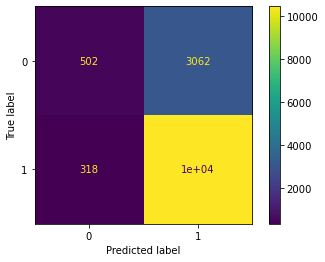

In [128]:
pred_with_age = clf_with_age.predict(X_test_a)
conf_with_age = confusion_matrix(y_test_a , pred_with_age)
fig = ConfusionMatrixDisplay(conf_with_age )
fig.plot();

In [129]:
# Without 'age', pretty much the same
X_train_na, X_test_na, y_train_na, y_test_na = train_test_split(X[['social_interaction', 'no_hardship', 'race_black',
                                                       'race_white', 'gender_female']], y, test_size=0.20, random_state=42)
clf_no_age = LogisticRegression(random_state=0).fit(X_train_na, y_train_na)
clf_no_age.score(X_test_na, y_test_na)

0.7608240223463687

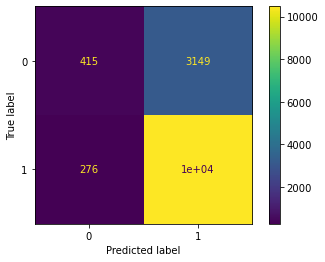

In [130]:
pred_clf_no_age = clf_no_age.predict(X_test_na)
conf_clf_no_age = confusion_matrix(y_test_na , pred_clf_no_age)
fig = ConfusionMatrixDisplay(conf_clf_no_age )
fig.plot();

In [133]:
print(f"Confusion matrix of LASSO\n{conf_with_age}\
\n\nConfusion matrix of RFE\n{conf_clf_no_age}")

Confusion matrix of LASSO
[[  502  3062]
 [  318 10438]]

Confusion matrix of RFE
[[  415  3149]
 [  276 10480]]


In [109]:
pred_clf_no_age = clf_no_age.predict(X_test_na)
conf_clf_no_age = confusion_matrix(y_test_na , pred_clf_no_age)

Confusion matrix of OLS
[[  775  4514]
 [  496 15695]]

Confusion matrix of Sigmoid
[[ 5289     0]
 [    0 16191]]


TypeError: __init__() missing 1 required positional argument: 'confusion_matrix'

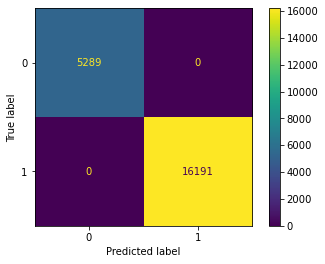

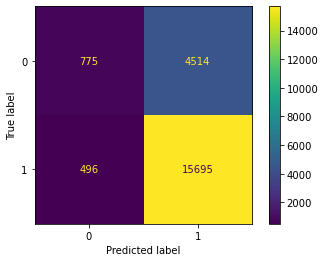

In [131]:
X_train, X_test, y_train, y_test = train_test_split(df[predictors],df['vaccine_hesitancy'], test_size=0.3, random_state=44)
full_train = X_train
full_train['vaccine_hesitancy'] = y_train
full_test = X_test
full_test['vaccine_hesitancy'] = y_test

model_ols = ols('vaccine_hesitancy~covid_death+withdrawn+distancing_stress+social_interaction+\
lack_companionship+can_find_companionship+gen_health+gen_mental_health+gen_social_health+\
gen_social_satisfac+no_home+no_meds+no_food+no_gas+no_rent+no_hardship+family_conflict+\
family_yelling+friend_conflict+no_conflict+age+race_asian+race_black+race_multiple+race_other+\
race_white+ethn_hispanic+ethn_none_of_these+ethn_not_hispanic+sex_male+gender_male',data=full_train).fit()


sigmoid_model = LogisticRegression().fit(X_train,y_train)
sigmoid_model.score(X_test,y_test)

pred_ols = model_ols.predict(X_test)
pred_sigmoid = sigmoid_model.predict_proba(X_test)
pred_sigmoid_class = sigmoid_model.predict(X_test)
pred_sigmoid = pred_sigmoid[:,1]


model_predictions = pd.DataFrame(columns = ['OLS_PRED','sigmoid_prob_PRED','sigmoid_class_PRED','actual'])
model_predictions['OLS_PRED'] = pred_ols
model_predictions['sigmoid_prob_PRED'] = pred_sigmoid
model_predictions['sigmoid_class_PRED'] = pred_sigmoid_class
model_predictions['actual'] = y_test

def class_pred(pred,cut_off):
    class_prediction=[]
    for i in pred:
        if i>=cut_off:
            class_prediction.append(1)
        else:
            class_prediction.append(0)
    return class_prediction

pred_ols_class=class_pred(model_predictions['OLS_PRED'],0.5)
model_predictions['ols_class_pred'] = pred_ols_class

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# A confusion matrix is a good indicator to show the accuracy of the model. The C0,0 is true negative(TN), C1,0 is false negative(FN)
#C1,1 is true positive (TP), and C0,1 is false positive( FP)
ols_conf_matrix = confusion_matrix(model_predictions['actual'],model_predictions['ols_class_pred'])
sigmoid_conf_matrix = confusion_matrix(model_predictions['actual'],model_predictions['sigmoid_class_PRED'])
print(f"Confusion matrix of OLS\n{ols_conf_matrix}\
\n\nConfusion matrix of Sigmoid\n{sigmoid_conf_matrix}")

disp1 = ConfusionMatrixDisplay(sigmoid_conf_matrix)
disp1.plot();

disp2 = ConfusionMatrixDisplay(ols_conf_matrix)
disp2.plot();
LASSO_conf_matrix = confusion_matrix(model_predictions['actual'],model_predictions['sigmoid_class_PRED'])

disp3= ConfusionMatrixDisplay()

In [93]:
# ROC curves for the model with and without age
probs_with_age = clf_with_age.predict_proba(X_test_a)
preds_with_age = probs_with_age[:,1]

fpr_a, tpr_a, thresholds_a = metrics.roc_curve(y_test_a, preds_with_age, pos_label=1)

probs_no_age = clf_no_age.predict_proba(X_test_na)
preds_no_age = probs_no_age[:,1]

fpr_na, tpr_na, thresholds_na = metrics.roc_curve(y_test_na, preds_no_age, pos_label=1)

In [94]:
l='covid_death+withdrawn+distancing_stress+social_interaction+\
lack_companionship+can_find_companionship+gen_health+gen_mental_health+gen_social_health+\
gen_social_satisfac+no_home+no_meds+no_food+no_gas+no_rent+no_hardship+family_conflict+\
family_yelling+friend_conflict+no_conflict+age+race_asian+race_black+race_multiple+race_other+\
race_white+ethn_hispanic+ethn_none_of_these+ethn_not_hispanic+sex_male+gender_male'
C=l.split('+')
Xs=df[C]
ys=df['vaccine_hesitancy']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=44)
sigmoid_model = LogisticRegression().fit(Xs_train,ys_train)
sigmoid_model.score(Xs_test,ys_test)

0.7654329608938547

In [95]:
model_ols = ols('vaccine_hesitancy~covid_death+withdrawn+distancing_stress+social_interaction+\
lack_companionship+can_find_companionship+gen_health+gen_mental_health+gen_social_health+\
gen_social_satisfac+no_home+no_meds+no_food+no_gas+no_rent+no_hardship+family_conflict+\
family_yelling+friend_conflict+no_conflict+age+race_asian+race_black+race_multiple+race_other+\
race_white+ethn_hispanic+ethn_none_of_these+ethn_not_hispanic+sex_male+gender_male',data=full_train).fit()
pred_ols_class=class_pred(model_predictions['OLS_PRED'],0.4)
model_predictions['ols_class_pred'] = pred_ols_class
C_O=l.split('+')
Xo=df[C_O]
yo=df['vaccine_hesitancy']
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size=0.3, random_state=44)
OLS_model = LogisticRegression().fit(Xo_train,yo_train)
OLS_model.score(Xo_test,yo_test)

0.7662476722532588

In [96]:
probs_with_s = sigmoid_model.predict_proba(Xs_test)
preds_with_s = probs_with_s[:,1]

fpr_s, tpr_s, thresholds_s = metrics.roc_curve(ys_test, preds_with_s, pos_label=1)

#probs_no_age = clf_no_age.predict_proba(X_test_na)
#preds_no_age = probs_no_age[:,1]

#fpr_na, tpr_na, thresholds_na = metrics.roc_curve(y_test_na, preds_no_age, pos_label=1)

In [97]:
probs_with_o = OLS_model.predict_proba(Xo_test)
preds_with_o = probs_with_o[:,1]

fpr_o, tpr_o, thresholds_o = metrics.roc_curve(yo_test, preds_with_o, pos_label=1)

#probs_no_age = clf_no_age.predict_proba(X_test_na)
#preds_no_age = probs_no_age[:,1]

#fpr_na, tpr_na, thresholds_na = metrics.roc_curve(y_test_na, preds_no_age, pos_label=1)

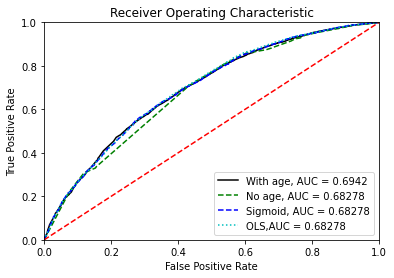

In [98]:
roc_auc_na = metrics.auc(fpr_na, tpr_na)
roc_auc_a = metrics.auc(fpr_a, tpr_a)
roc_auc_s=metrics.auc(fpr_s,tpr_s)
roc_auc_o=metrics.auc(fpr_o,tpr_o)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')

plt.plot(fpr_a, tpr_a, 'k',label = 'With age, AUC = %0.4f' % roc_auc_a)
plt.plot(fpr_na, tpr_na, 'g--',label = 'No age, AUC = %0.5f' % roc_auc_na)
plt.plot(fpr_s, tpr_s, 'b--',label = 'Sigmoid, AUC = %0.5f' % roc_auc_na)
plt.plot(fpr_o,tpr_o,'c:',label='OLS,AUC = %0.5f' % roc_auc_na)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
x=df.drop('vaccine_hesitancy',axis=1)
y=df['vaccine_hesitancy']


In [102]:
x.columns

Index(['covid_death', 'withdrawn', 'distancing_stress', 'social_interaction',
       'lack_companionship', 'can_find_companionship', 'gen_health',
       'gen_mental_health', 'gen_social_health', 'gen_social_satisfac',
       'no_home', 'no_meds', 'no_food', 'no_gas', 'no_rent', 'no_hardship',
       'family_conflict', 'family_yelling', 'friend_conflict', 'no_conflict',
       'age', 'race_asian', 'race_black', 'race_multiple', 'race_other',
       'race_white', 'ethn_hispanic', 'ethn_none_of_these',
       'ethn_not_hispanic', 'sex_female', 'sex_male', 'gender_female',
       'gender_male'],
      dtype='object')

In [103]:
feature=''
for i in range(len(x.columns)):
    new=x.columns[i]
    feature=feature+'+'+new

In [104]:
feature

'+covid_death+withdrawn+distancing_stress+social_interaction+lack_companionship+can_find_companionship+gen_health+gen_mental_health+gen_social_health+gen_social_satisfac+no_home+no_meds+no_food+no_gas+no_rent+no_hardship+family_conflict+family_yelling+friend_conflict+no_conflict+age+race_asian+race_black+race_multiple+race_other+race_white+ethn_hispanic+ethn_none_of_these+ethn_not_hispanic+sex_female+sex_male+gender_female+gender_male'

In [106]:
model_ols = ols('vaccine_hesitancy~covid_death+withdrawn+distancing_stress+social_interaction+\
lack_companionship+can_find_companionship+gen_health+gen_mental_health+gen_social_health+\
gen_social_satisfac+no_home+no_meds+no_food+no_gas+no_rent+no_hardship+family_conflict+\
family_yelling+friend_conflict+no_conflict+age+race_asian+race_black+race_multiple+race_other+\
race_white+ethn_hispanic+ethn_none_of_these+ethn_not_hispanic+sex_male+gender_male',data=df).fit()

sigmoid_model = LogisticRegression().fit(x,y)


In [108]:
print(model_ols.summary2())

                                     Results: Ordinary least squares
Model:                            OLS                           Adj. R-squared:                 0.101     
Dependent Variable:               vaccine_hesitancy             AIC:                            74293.8975
Date:                             2021-12-09 18:31              BIC:                            74532.5476
No. Observations:                 71600                         Log-Likelihood:                 -37121.   
Df Model:                         25                            F-statistic:                    323.2     
Df Residuals:                     71574                         Prob (F-statistic):             0.00      
R-squared:                        0.101                         Scale:                          0.16520   
----------------------------------------------------------------------------------------------------------
                            Coef.           Std.Err.       t     P>|t|     